Test whether/how to use orphics to deal with $W^g$

In [1]:
%matplotlib inline
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np

repoDir= os.getcwd()
os.chdir(os.path.join(repoDir, '../..' ))
repoDir= os.getcwd()
cambPath= repoDir+'/CAMB/CAMB-Jan2017/pycamb'
print cambPath
sys.path.insert(0, cambPath)

import camb
from camb import model, initialpower

from orphics.theory.cosmology import LimberCosmology

import healpy as hp
import scipy
from mpl_toolkits.mplot3d import Axes3D

/Users/Humna/repos/CAMB/CAMB-Jan2017/pycamb


In [2]:
zmin, zmax= 0, 600.
lmax= 1000.
ellrange= np.arange(0, lmax)

In [3]:
limber= LimberCosmology(lmax= lmax, skipCls= True)

Initializing CMB window..
initializing power...


In [4]:
gkey= 'g'
limber.addStepNz(gkey, bias= .5, zmin= zmin, zmax= zmax)

Initializing galaxy window for  g  ...


In [5]:
limber.generateCls(ellrange=ellrange)

In [6]:
Cell_orp= {}
Cell_orp['kk']=  limber.getCl('cmb','cmb')
Cell_orp[gkey+'k']= limber.getCl('cmb',gkey)
Cell_orp[gkey+gkey]=  limber.getCl(gkey, gkey)

In [7]:
def plot(x, y, xlabel, ylabel, sci= False):
    plt.clf()
    plt.plot(x, y)
    plt.xlabel(xlabel, fontsize= 18)
    plt.ylabel(ylabel, fontsize= 18)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    #plt.xlim(0,500)
    #plt.ylim(0,0.00002)
    if sci: plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    fig= plt.gcf()
    #fig.set_size_inches(10.5, 7.5)
    plt.show()

In [8]:
zs= limber.zs

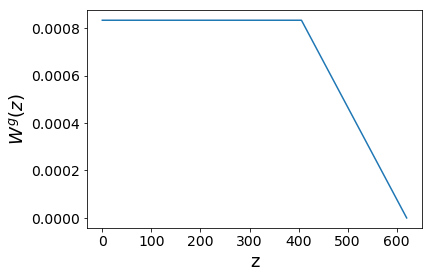

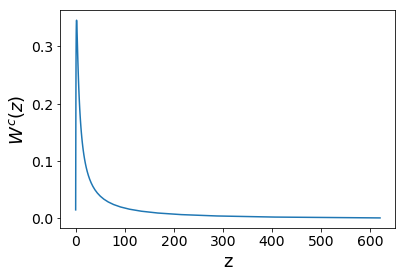

In [9]:
W_g= limber.kernels[gkey]['W']
W_c= limber.kernels['cmb']['W']

plot(zs, W_g, 'z', '$W^g(z)$')
plot(zs, W_c, 'z', '$W^c(z)$')

Want flat$W^g$ for all z-bins rn.., i.e., something like:

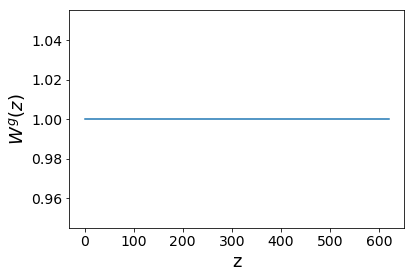

In [10]:
def Wg(z): return np.ones(len(np.array(z)))
plot(zs, Wg(zs), 'z', '$W^g(z)$')

Is this not ok? Why is LimberCosmology giving something different?